# Lab Segmentation 1

In [79]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[[51. 51. 51. ... 65. 65. 65.]
 [51. 51. 51. ... 65. 65. 65.]
 [52. 51. 51. ... 65. 65. 65.]
 ...
 [57. 55. 55. ... 71. 72. 77.]
 [58. 55. 54. ... 68. 69. 73.]
 [58. 55. 54. ... 65. 64. 68.]]


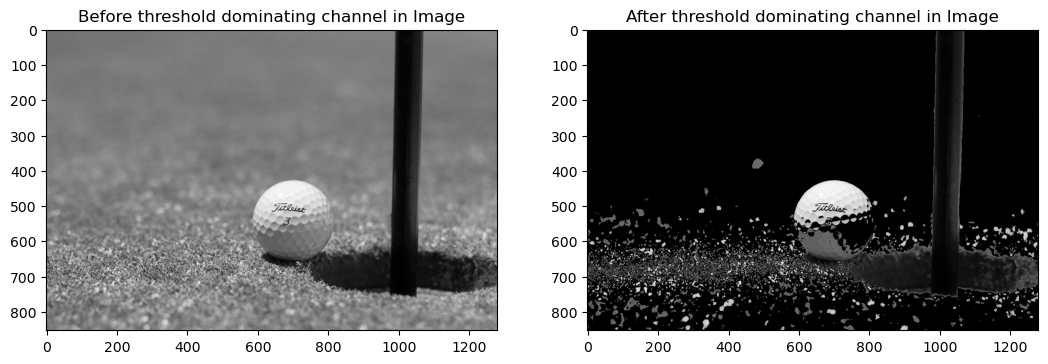

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


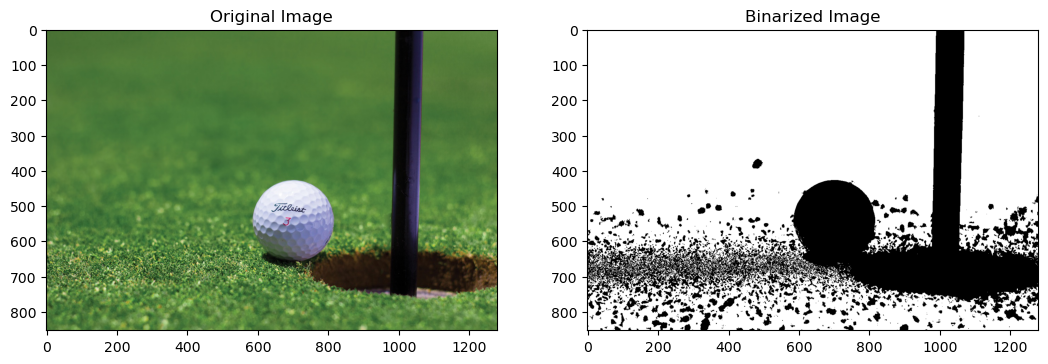

In [80]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('./imgs/exp1/golf.jpeg')
image = img.astype(float)

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
[R,G,B] = image[:,:,0], image[:,:,1], image[:,:,2]
print(B)
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
    # ANS: dominating channel is the green channel

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
# thresholding the green channel

image_after_thresholding = np.copy(G)
upper_threshold = 170
lower_threshold = 110
# image_after_thresholding[image_after_thresholding>upper_threshold] = 255
# image_after_thresholding[image_after_thresholding<lower_threshold] = 255
image_after_thresholding[(image_after_thresholding > lower_threshold) & (image_after_thresholding < upper_threshold)] = 0
show_images([G,image_after_thresholding], ['Before threshold dominating channel in Image','After threshold dominating channel in Image'])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

image_binarized = np.copy(image)
threhold_value = 110

image_binarized[(G>threhold_value) & (R<threhold_value) & (B<threhold_value)] = [255,255,255]
image_binarized[(G<threhold_value) | (R>threhold_value) | (B>threhold_value)] = [0,0,0]

# 6- display the binarized image
show_images([img,image_binarized], ['Original Image','Binarized Image'])






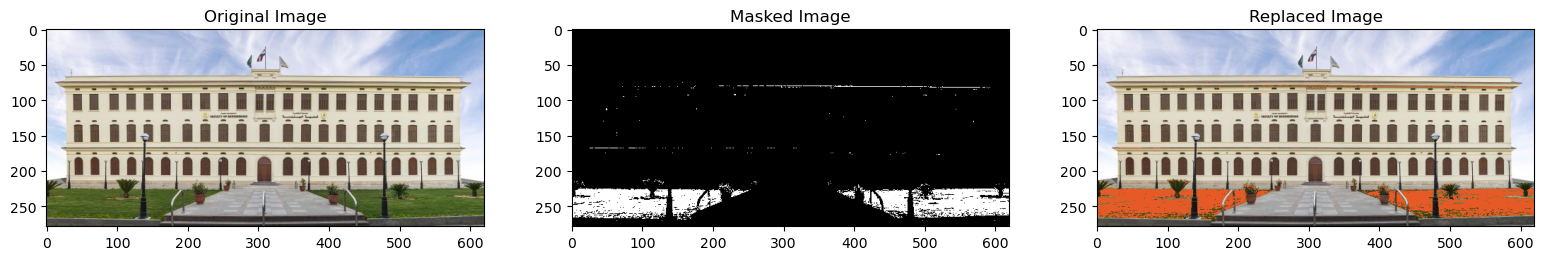

In [85]:
# 1- Get the required RGB color (Using a color picker)
# grass color #516528 to rgb [81,101,40]
required_color = [81, 101, 40]

# 2- Read image
img = io.imread('./imgs/exp2/cufe.png')
image_2 = img.astype(float)

# 3- extract R, G and B channels (as float)
[R,G,B] = image_2[:,:,0], image_2[:,:,1], image_2[:,:,2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_R = R - required_color[0]
diff_G = G - required_color[1]
diff_B = B - required_color[2]

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distances = np.sqrt(diff_R**2 + diff_G**2 + diff_B**2)
# print(distances)

# 6-  create a mask by thresholding the differences
threhold_value = 30

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
masked_image = np.zeros(R.shape)
masked_image[distances < threhold_value] = 255

replaced_image = np.copy(img)
replaced_image[masked_image == 255] = [230,90,40]

# 8- show the image or save it
show_images([img,masked_image, replaced_image], ['Original Image','Masked Image','Replaced Image'])
